<a href="https://colab.research.google.com/github/Rafiprabowo/Pengolahan-Citra-dan-Visi-Komputer/blob/main/pertemuan-6/06_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pratikum pertemuan 6 Histogram Equalization
## Nama : Muhamad Rafi Prabowo
## NIM : 2141720239
## Kelas : TI 3D


# 1. Mount Drive


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# 2. Import Library

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


# 3. Membuat Histogram

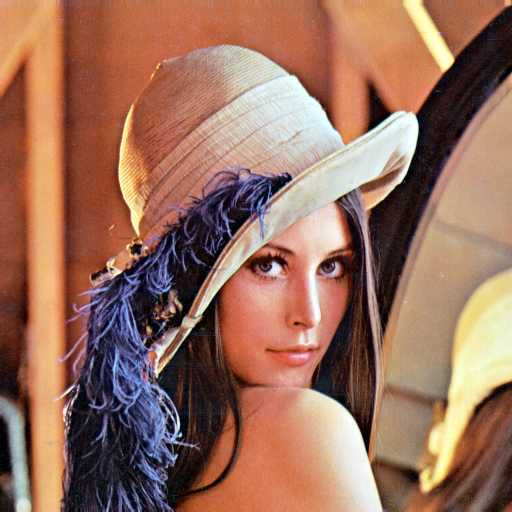

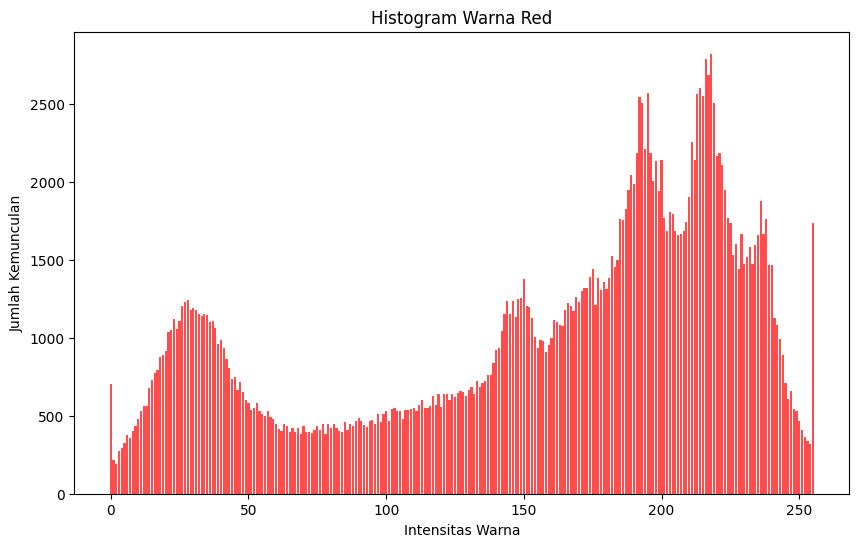

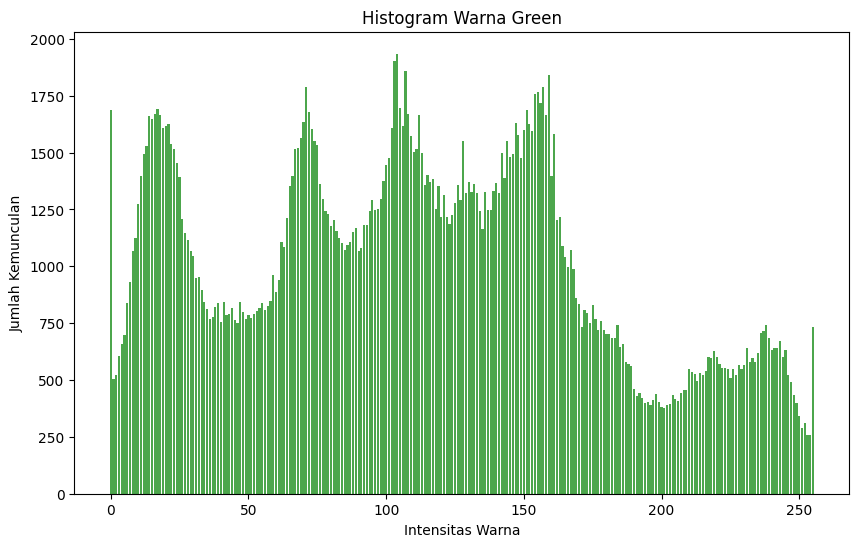

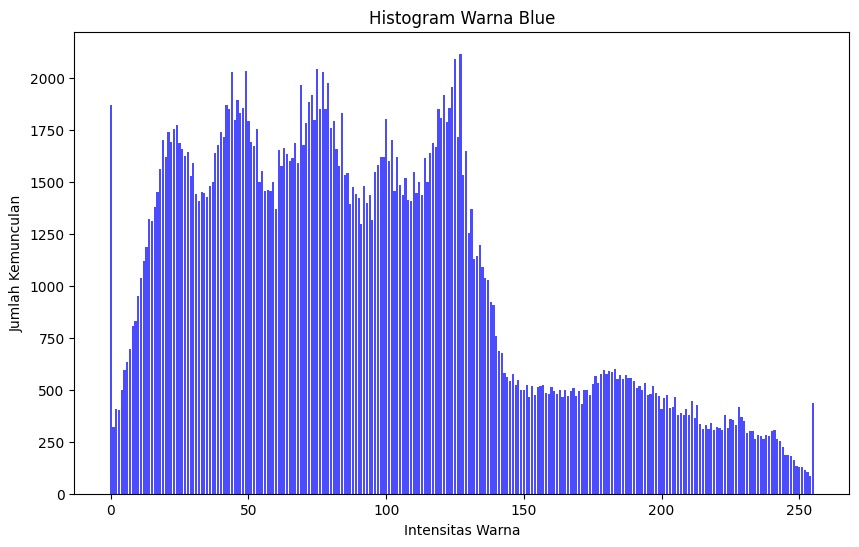

In [30]:
image = cv.imread('/content/drive/MyDrive/images/lena.jpeg')
cv2_imshow(image)
def pixel(image):
  red = {}
  green = {}
  blue = {}

  # Akses per pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      b = int(image[y, x, 0])
      g = int(image[y, x, 1])
      r = int(image[y, x, 2])

      if r in red:
        red[r] += 1
      else:
        red[r] = 1

      if g in green:
        green[g] += 1
      else:
        green[g] = 1

      if b in blue:
        blue[b] += 1
      else:
        blue[b] = 1

  return red, green, blue

def histogram(intensitas, warna):
  plt.figure(figsize=(10, 6))
  plt.bar(intensitas.keys(), intensitas.values(), color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

intensitas_merah, intensitas_hijau, intensitas_biru = pixel(image)
histogram(intensitas_merah, 'red')
histogram(intensitas_hijau, 'green')
histogram(intensitas_biru, 'blue')





# 4. Menampilkan Histogram dengan Library NumPY

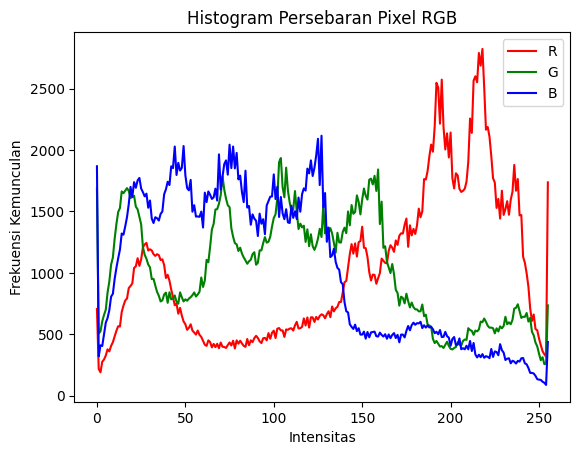

In [24]:
# Split the image into RGB channels
b, g, r = cv.split(image)

#calculate the histograms for each channel
r_hist = np.histogram(r.ravel(), bins=256, range=(0, 256))
g_hist = np.histogram(g.ravel(), bins=256, range=(0, 256))
b_hist = np.histogram(b.ravel(), bins=256, range=(0, 256))

#plot the histograms
plt.figure()
plt.title('Histogram Persebaran Pixel RGB')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi Kemunculan')

plt.plot(r_hist[1][:-1], r_hist[0], color='red', label= 'R' )
plt.plot(g_hist[1][:-1], g_hist[0], color='green', label= 'G' )
plt.plot(b_hist[1][:-1], b_hist[0], color='blue', label= 'B' )

plt.legend()
plt.show()





# 5. Menampilkan histogram dari gambar yang telah diproses dengan histogram equalization dan juga menampilkan gambar sebelum dan sesudah proses

In [40]:
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3, 256))
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax
histo_asli = histog(img1)

# Konversi ke Numpy array
img_array = np.asarray(img1)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisais
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))  # Menggabungkan gambar
cv2_imshow(final_frame)

color_ranges = np.arange(256)

# Mengonversi gambar asli menjadi grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

is_gray_img = np.array_equal(img1_gray, img2_gray)

if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(color_ranges, histo_asli[2], color='red')
    axs[0, 1].bar(color_ranges, histo_asli[1], color='green')
    axs[0, 2].bar(color_ranges, histo_asli[0], color='blue')
    axs[1, 0].bar(color_ranges, equal_histo[2], color='red')
    axs[1, 1].bar(color_ranges, equal_histo[1], color='green')
    axs[1, 2].bar(color_ranges, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(color_ranges, histo_asli[2], color='gray')
    axs[1].bar(color_ranges, equal_histo[2], color='gray')

plt.show()

AttributeError: ignored